# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import pandas as pd
from scipy import ndimage, misc

import os
import glob

import warnings
warnings.filterwarnings('ignore')

from scipy.signal import argrelextrema
from scipy.optimize import curve_fit
from scipy import fftpack

matplotlib.rc("savefig",dpi=100)

## Image analysis imports

In [13]:
# skimage imports
from skimage import exposure
from skimage.color import rgb2gray
from skimage import color
from skimage.util import crop
from skimage.transform import rotate
# catch annoying precision warnings for certain 
# skimage operations
import warnings
warnings.catch_warnings()

catch_warnings()

In [4]:
from image_helper import (add_scalebar, constantMeanContrast,
                                radial_profile_fft,d_from_fft)


In [5]:
micron_per_pixel = {'4x':1000/696, '10x':1000/1750,
                       '20x':500/1740, '50x':230/2016}
image_width_pixels = 2048
image_width_microns = {}
for k,v in micron_per_pixel.items():
    image_width_microns[k]=v*image_width_pixels
print(image_width_microns)

image_area_microns={}
for k,v in image_width_microns.items():
    image_area_microns[k]=v**2 * 1536/2048

print(image_area_microns)

{'4x': 2942.5287356321837, '10x': 1170.2857142857142, '20x': 588.5057471264367, '50x': 233.65079365079364}
{'4x': 6493856.520015854, '10x': 1027176.4897959183, '20x': 259754.26080063413, '50x': 40944.520030234315}


# Pattern Quality of 163 C TPBi

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


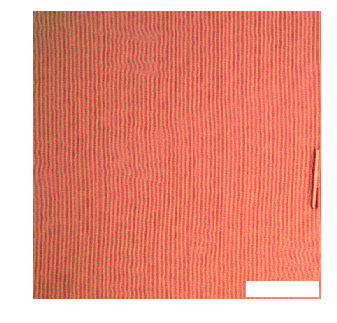

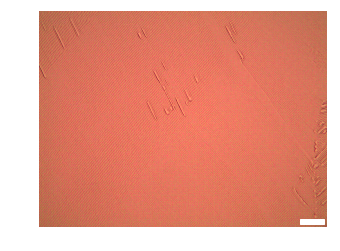

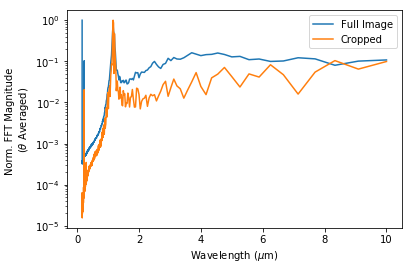

In [14]:
# Exemplary 163 C TPBi image
image_file = 'T=162.5C_Mag=50x_Polarized=0_-000007.png'
# Load file
img = misc.imread(os.path.join('example images',image_file))

# Rotate
rot_img = rotate(img,angle=-30)
# Crop - image[y1:y2,x1:x2]
# width = 600
# y1 = 150
# x1 = 250
width = 700
y1 = 200
x1 = 175
crop_img = rot_img[y1:y1+width,x1:x1+width]
# Improve contrast
crop_img = constantMeanContrast(crop_img,3)

fig,ax = plt.subplots(figsize=(4,crop_img.shape[0]/crop_img.shape[1]*4))
ax.imshow(crop_img)
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax.axis('tight')
ax.axis('off')
add_scalebar(ax,length=20,unit='um',mag='50x',
             show_label=False,height=35)
plt.show()

fig,ax = plt.subplots(figsize=(4,img.shape[0]/img.shape[1]*4))
ax.imshow(img)
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax.axis('tight')
ax.axis('off')
add_scalebar(ax,length=20,unit='um',mag='50x',
             show_label=False,height=35)
plt.show()

before_crop=d_from_fft(img,order=15,d_upper=2)
after_crop=d_from_fft(crop_img,order=15,d_upper=2)
plt.semilogy(1/before_crop['k'],before_crop['radial']/np.amax(before_crop['radial']),label='Full Image')
plt.semilogy(1/after_crop['k'],after_crop['radial']/np.amax(after_crop['radial']),label='Cropped')
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Norm. FFT Magnitude \n' +  r'($\theta$ Averaged)')
plt.legend()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


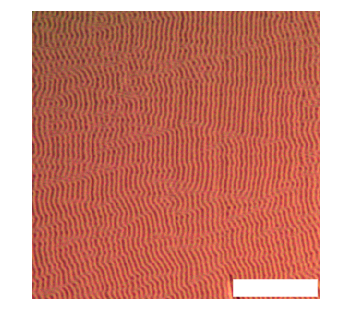

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


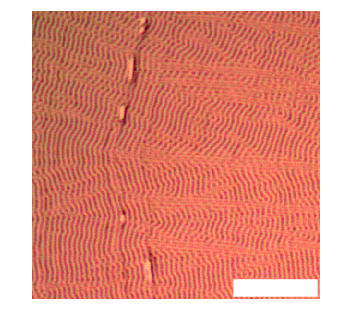

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


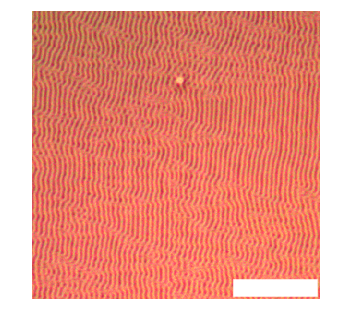

NameError: name 'after_crop' is not defined

In [9]:
# Compare FFTs along ordered and disordered directions
image_files = ['T=162.5C_Mag=50x_Polarized=0_-000000.png',
               'T=162.5C_Mag=50x_Polarized=0_-000003.png',
               'T=162.5C_Mag=50x_Polarized=0_-000006.png']
disordered=[]
x1_list=[400,500,700]
y1_list=[100,100,100]
rotation=[10,70,40]
for i,image_file in enumerate(image_files):
    # Load file
    rot_img = misc.imread(os.path.join(opticalDir,image_file))
    # Improve contrast
    #rot_img = exposure.equalize_hist(rot_img)
    # Rotate
    rot_img = rotate(rot_img,angle=rotation[i])
    # Crop - image[y1:y2,x1:x2]
    width = 600
    y1 = y1_list[i]
    x1=x1_list[i]
    rot_img = rot_img[y1:y1+width,x1:x1+width]
    # Improve contrast
    #rot_img = exposure.rescale_intensity(rot_img, in_range='image')
    rot_img = constantMeanContrast(rot_img,3)
    fig,ax = plt.subplots(figsize=(4,rot_img.shape[0]/rot_img.shape[1]*4))
    ax.imshow(rot_img)
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
    ax.axis('tight')
    ax.axis('off')
    add_scalebar(ax,length=20,unit='um',mag='50x',
                 show_label=False,height=35)
    #matplotlib.rc('axes',edgecolor='k')
    plt.savefig(os.path.join('FFT Trials','Image #'+str(i+1)+'.png'),dpi=300)
    plt.show()
    disordered.append(d_from_fft(rot_img,order=15,d_upper=2))

plt.semilogy(1/after_crop['k'],after_crop['radial']/np.amax(after_crop['radial']),label='Ordered Direction')
for i,d in enumerate(disordered):
    plt.semilogy(1/d['k'],d['radial']/np.amax(d['radial']),label='Image #'+str(i+1))

plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Norm. FFT Magnitude \n' +  r'($\theta$ Averaged)')
plt.ylim([1e-4,2])
plt.legend()
plt.savefig(os.path.join('FFT Trials','Ordered_vs_disordered_ffts.png'),dpi=300,bbox_inches='tight')
#plt.text(20,50,'(b) 163 $^{\circ}$C',fontsize=16,color='k',
#        bbox=dict(facecolor='white', alpha=0.4))

In [ ]:
# image files to analyze
image_files = ['T=162.5C_Mag=50x_Polarized=0_-000000.png',
                'T=162.5C_Mag=50x_Polarized=0_-000001.png',
                'T=162.5C_Mag=50x_Polarized=0_-000002.png',
                'T=162.5C_Mag=50x_Polarized=0_-000003.png',
                'T=162.5C_Mag=50x_Polarized=0_-000004.png',
                'T=162.5C_Mag=50x_Polarized=0_-000005.png',
                'T=162.5C_Mag=50x_Polarized=0_-000006.png',
                'T=162.5C_Mag=50x_Polarized=0_-000007.png',
                'T=162.5C_Mag=50x_Polarized=0_-000008.png',
                'T=162.5C_Mag=50x_Polarized=0_-000009.png',
                'T=162.5C_Mag=50x_Polarized=0_-000010.png',
                'T=162.5C_Mag=50x_Polarized=0_-000011.png']
image_files = [os.path.join(opticalDir,x) for x in image_files]
thicknessDir = os.path.join('2018-03-27_TPBi_Si_UVOzone',
                            '2018-03-27_OpticalMicroscopy')
image_files_2 = ['T=160C_Mag=50x_Polarized=0_t=30nm_-000000.png',
               'T=160C_Mag=50x_Polarized=0_t=30nm_-000001.png',
               'T=160C_Mag=50x_Polarized=0_t=30nm_-000002.png',
               'T=160C_Mag=50x_Polarized=0_t=30nm_-000003.png',
               'T=160C_Mag=50x_Polarized=0_t=30nm_-000004.png',
               'T=160C_Mag=50x_Polarized=0_t=30nm_-000005.png',
               'T=160C_Mag=50x_Polarized=0_t=30nm_-000006.png',
               'T=160C_Mag=50x_Polarized=0_t=30nm_-000007.png']
image_files_2 = [os.path.join(thicknessDir,x) for x in image_files_2]
image_files.extend(image_files_2)
print(len(image_files))

0


FileNotFoundError: [Errno 2] No such file or directory: 'T=162.5C_Mag=50x_Polarized=0_-000000.png'

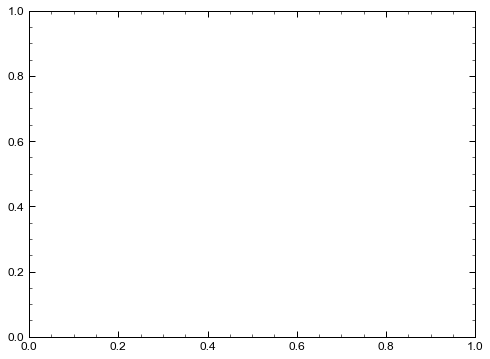

In [22]:
# Loop through all images at 50x for annealing temperatures of ~160-162.5
# select which regions to inspect for FFT analysis
disordered=[]
x1_list=[]
y1_list=[]
#rotation=[10,70,40]
fig,ax = plt.subplots(figsize=(8,1536/2048*8))
for i,image_file in enumerate(image_files):
    print(i)
    # Load file
    rot_img = misc.imread(image_file)
    # Improve contrast
    #rot_img = exposure.equalize_hist(rot_img)
    # Rotate
    #rot_img = rotate(rot_img,angle=rotation[i])
    # Crop - image[y1:y2,x1:x2]
    width = 600
    #y1 = y1_list[i]
    #x1=x1_list[i]
    #rot_img = rot_img[y1:y1+width,x1:x1+width]
    # Improve contrast
    #rot_img = exposure.rescale_intensity(rot_img, in_range='image')
    #rot_img = constantMeanContrast(rot_img,3)
    
    plt.imshow(rot_img)
    plt.show()
    #fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
    #ax.axis('tight')
    #ax.axis('off')
    #add_scalebar(ax,length=20,unit='um',mag='50x',
    #             showLabel=False,height=35)
    #matplotlib.rc('axes',edgecolor='k')
    #plt.savefig(os.path.join('FFT Trials','Image #'+str(i+1)+'.png'),dpi=300)
    x1_list.append(input('x1'))
    y1_list.append(input('y1?'))
    #disordered.append(d_from_fft(rot_img,order=15,d_upper=2))

In [22]:
x1_list=[200, 1400, 0, 0, 0, 0, 1400, 400, 500, 0, 750, 500, 1440, 0, 0, 1440, 0, 500, 500, 0]
y1_list=[0, 0, 250, 0, 0, 0, 0, 40, 500, 0, 900, 500, 500, 500, 500, 500, 0, 900, 500, 0]

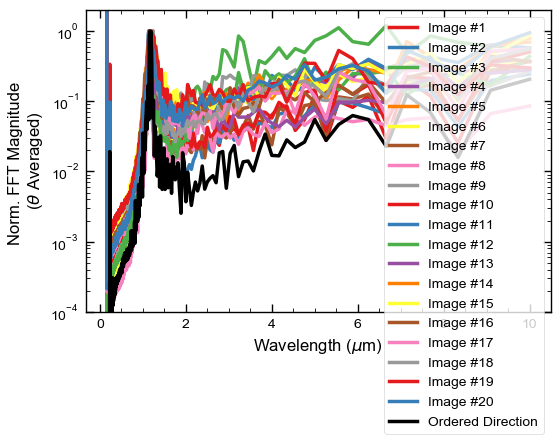

In [33]:
disordered=[]
x1_list=[int(x) for x in x1_list]
y1_list=[int(x) for x in y1_list]
#x1_list=[200, 1400, 0, 0, 0, 0, 1400, 400, 500, 0, 750, 500, 1440, 0, 0, 1440, 0, 500, 500, 0]
#y1_list=[0, 0, 250, 0, 0, 0, 0, 40, 500, 0, 900, 500, 500, 500, 500, 500, 0, 900, 500, 0]
for i,image_file in enumerate(image_files):
    # Load file
    rot_img = misc.imread(image_file)
    
    # Rotate
    #rot_img = rotate(rot_img,angle=rotation[i])
    # Crop - image[y1:y2,x1:x2]
    width = 600
    y1 = y1_list[i]
    x1=x1_list[i]
    rot_img = rot_img[y1:y1+width,x1:x1+width]
    # Improve contrast
    #rot_img = exposure.rescale_intensity(rot_img, in_range='image')
#     rot_img = exposure.equalize_hist(rot_img)
    #rot_img = constantMeanContrast(rot_img,2)
#     fig,ax = plt.subplots(figsize=(4,rot_img.shape[0]/rot_img.shape[1]*4))
#     ax.imshow(rot_img)
#     fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
#     ax.axis('tight')
#     ax.axis('off')
#     add_scalebar(ax,length=20,unit='um',mag='50x',
#                  label=False,height=35)
#     #matplotlib.rc('axes',edgecolor='k')
#     plt.savefig(os.path.join('FFT Trials','large_set_fft_analysis','Image #'+str(i+1)+'.png'),dpi=300)
#     plt.show()
    disordered.append(d_from_fft(rot_img,order=15,d_upper=2))


for i,d in enumerate(disordered):
    norm_range_idx = np.logical_and((1/d['k'])<2.5,(1/d['k'])>.8)
    plt.semilogy(1/d['k'],d['radial']/np.amax(d['radial'][norm_range_idx]),label='Image #'+str(i+1))

plt.semilogy(1/after_crop['k'],after_crop['radial']/np.amax(after_crop['radial']),'k',label='Ordered Direction')
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Norm. FFT Magnitude \n' +  r'($\theta$ Averaged)')
plt.ylim([1e-4,2])
plt.legend()
plt.savefig(os.path.join('FFT Trials','large_set_fft_analysis','Ordered_vs_disordered_ffts.png'),dpi=300,bbox_inches='tight')

(0, 8)

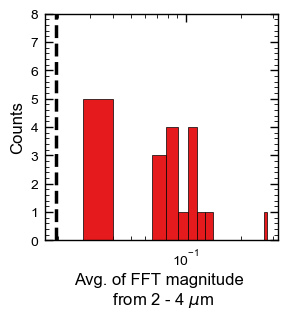

In [118]:
# average the portion of the fft spectrum between 2 and 4 microns
# and plot a histogram
average_fft_2_to_4_um=[]
wavelength=1/after_crop['k']
norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
norm_fft = after_crop['radial']/np.amax(after_crop['radial'][norm_range_idx])
range_idx = np.logical_and(wavelength<4,wavelength>2)
ref_avg = np.mean(norm_fft[range_idx])
for i,d in enumerate(disordered):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    range_idx = np.logical_and(wavelength<4,wavelength>2)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    #average_fft_2_to_4_um.append(np.mean(d['radial'][range_idx]))
    average_fft_2_to_4_um.append(np.mean(norm_fft[range_idx]))
    #plt.semilogy(wavelength,d['radial'])
#plt.show()
fig,ax=plt.subplots(figsize=(3,3))
plt.hist(average_fft_2_to_4_um,bins=20,edgecolor='k')
plt.plot([ref_avg,ref_avg],[0,8],'--k')
plt.xlabel('Avg. of FFT magnitude \n from 2 - 4 $\mu$m')
plt.ylabel('Counts')
plt.xscale('log')
plt.ylim(0,8)
#setNiceTicks(plt.gca(),Ny=8,Nx=7)
#plt.savefig(os.path.join('FFT Trials','FFT-histogram.png'),bbox_inches='tight',dpi=300)

In [81]:
# analysis without cropping
disordered_no_crop=[]
x1_list=[int(x) for x in x1_list]
y1_list=[int(x) for x in y1_list]
#x1_list=[200, 1400, 0, 0, 0, 0, 1400, 400, 500, 0, 750, 500, 1440, 0, 0, 1440, 0, 500, 500, 0]
#y1_list=[0, 0, 250, 0, 0, 0, 0, 40, 500, 0, 900, 500, 500, 500, 500, 500, 0, 900, 500, 0]
for i,image_file in enumerate(image_files):
    # Load file
    rot_img = misc.imread(image_file)
    # Improve contrast
    rot_img = exposure.equalize_hist(rot_img)

    disordered_no_crop.append(d_from_fft(rot_img,order=15,d_upper=2))
# average the portion of the fft spectrum between 2 and 4 microns
# and plot a histogram
average_fft_2_to_4_um=[]
wavelength=1/after_crop['k']
norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
norm_fft = after_crop['radial']/np.amax(after_crop['radial'][norm_range_idx])
range_idx = np.logical_and(wavelength<4,wavelength>2)
ref_avg = np.mean(norm_fft[range_idx])
for i,d in enumerate(disordered_no_crop):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    range_idx = np.logical_and(wavelength<4,wavelength>2)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    average_fft_2_to_4_um.append(np.mean(norm_fft[range_idx]))

(0, 8)

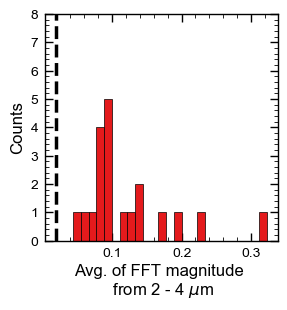

In [83]:
# Plot analysis without cropping
fig,ax=plt.subplots(figsize=(3,3))
plt.hist(average_fft_2_to_4_um,bins=25,edgecolor='k')
plt.plot([ref_avg,ref_avg],[0,8],'--k')
plt.xlabel('Avg. of FFT magnitude \n from 2 - 4 $\mu$m')
plt.ylabel('Counts')
#plt.xscale('log')
plt.ylim(0,8)
#setNiceTicks(plt.gca(),Ny=8,Nx=7)
#plt.savefig(os.path.join('FFT Trials','FFT-histogram-without-crop.png'),bbox_inches='tight',dpi=300)

## Multiple crop regions per image

The point of this is that the crop dimension appears to impact the grating quality metric (see section below), and so each image should be subdivided into equal crop dimensions for proper comparison to the reference image.

Consider going through all multicrop regions and manually selecting whether region has one or more orientations, to consider just pattern quality, not alignment.

In [9]:
%matplotlib notebook

In [10]:
from IPython.display import clear_output
from ipywidgets import IntSlider, Output
from IPython.display import display

<IPython.core.display.Javascript object>


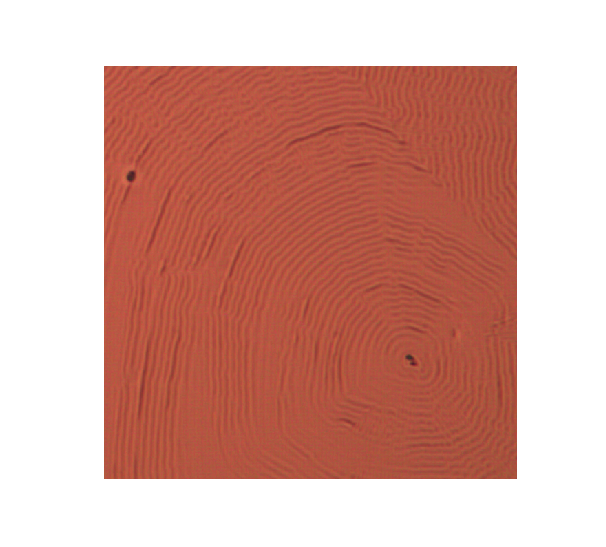

In [14]:
fig,ax=plt.subplots(figsize=(8,8))

In [15]:
# loop

#fig,ax=plt.subplots()
out = Output()
display(out)
x1_list=[0,0,600,600,1200,1200]
y1_list=[0,600,0,600,0,600]
width = 600
one_orientation_bools=[[False]*len(y1_list)]*len(image_files)
for i,image_file in enumerate(image_files):
    # Load file
    img = misc.imread(image_file)
    for ci,y1 in enumerate(y1_list):
        with out:
            clear_output(wait=True)
        x1=x1_list[ci]
        crop_img = img[y1:y1+width,x1:x1+width]
        ax.imshow(crop_img)
        ax.axis('off')
        fig.canvas.draw()
        with out:
            bool_str=input('One orientation? 1=y,0=n: ')
        if bool_str=='1':
            one_orientation_bools[i][ci]=True
        else:
            one_orientation_bools[i][ci]=False

One orientation? 1=y,0=n: 0


In [16]:
print(one_orientation_bools)

[[True, True, True, True, False, False], [True, True, True, True, False, False], [True, True, True, True, False, False], [True, True, True, True, False, False], [True, True, True, True, False, False], [True, True, True, True, False, False], [True, True, True, True, False, False], [True, True, True, True, False, False], [True, True, True, True, False, False], [True, True, True, True, False, False], [True, True, True, True, False, False], [True, True, True, True, False, False], [True, True, True, True, False, False], [True, True, True, True, False, False], [True, True, True, True, False, False], [True, True, True, True, False, False], [True, True, True, True, False, False], [True, True, True, True, False, False], [True, True, True, True, False, False], [True, True, True, True, False, False]]


0.0867401521093


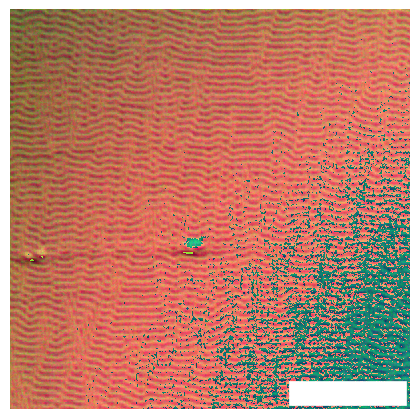

0.0872793812293


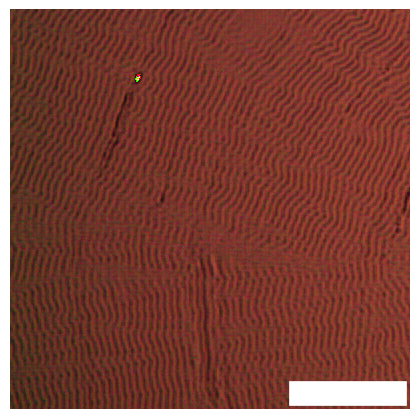

0.0956771561082


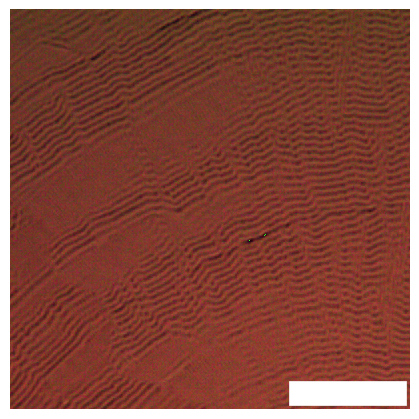

0.0886666248072


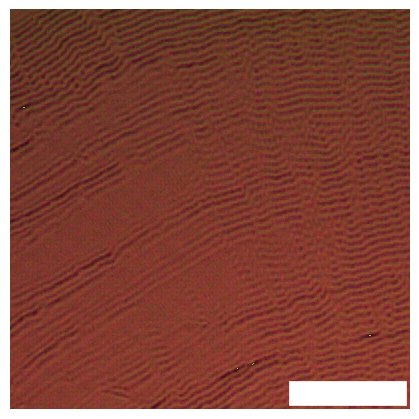

0.0872799173521


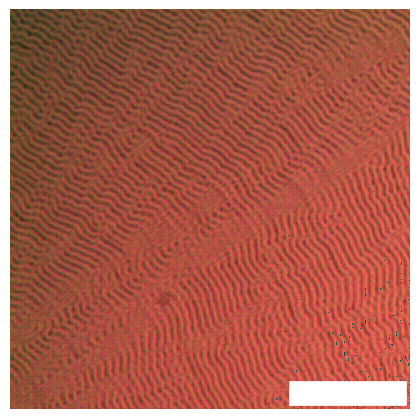

In [78]:
# multiple crop regions
disordered_multi=[]
x1_list=[int(x) for x in x1_list]
y1_list=[int(x) for x in y1_list]
#x1_list=[200, 1400, 0, 0, 0, 0, 1400, 400, 500, 0, 750, 500, 1440, 0, 0, 1440, 0, 500, 500, 0]
#y1_list=[0, 0, 250, 0, 0, 0, 0, 40, 500, 0, 900, 500, 500, 500, 500, 500, 0, 900, 500, 0]
x1_list=[0,0,600,600,1200,1200]
y1_list=[0,600,0,600,0,600]
width = 600
i_list=[]
ci_list=[]
for i,image_file in enumerate(image_files):
    # Load file
    img = misc.imread(image_file)
    for ci,y1 in enumerate(y1_list):
        x1=x1_list[ci]
        crop_img = img[y1:y1+width,x1:x1+width]
        if one_orientation_bools[i][ci]:
            disordered_multi.append(d_from_fft(crop_img,order=15,d_upper=2))
            wavelength=1/disordered_multi[-1]['k']
            norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
            range_idx = np.logical_and(wavelength<4,wavelength>2)
            radial=disordered_multi[-1]['radial']
            norm_fft=radial/np.amax(radial[norm_range_idx])
            avg_fft_2_to_4_um = np.mean(norm_fft[range_idx])
            if (avg_fft_2_to_4_um>0.086) and (avg_fft_2_to_4_um<0.098):
                print(avg_fft_2_to_4_um)
                crop_img = constantMeanContrast(crop_img,3)
                fig,ax = plt.subplots(figsize=(4,crop_img.shape[0]/crop_img.shape[1]*4))
                ax.imshow(crop_img)
                fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
                ax.axis('tight')
                ax.axis('off')
                hideAxes(ax)
                add_scalebar(ax,length=20,unit='um',mag='50x',
                             show_label=False,height=35)
                plt.savefig(os.path.join('FFT Trials','rep163C_i='+str(i)+'_ci='+str(ci)+'.png'),dpi=300)
                plt.show()

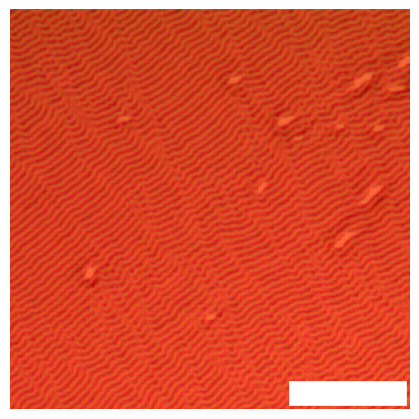

In [67]:
i = 5
ci = 2
img = misc.imread(image_files[i])
x1=x1_list[ci]
y1=y1_list[ci]
crop_img = img[y1:y1+width,x1:x1+width]

crop_img = exposure.rescale_intensity(crop_img, in_range='image')
#crop_img = constantMeanContrast(crop_img,1.15)
#crop_img = exposure.equalize_hist(crop_img)
fig,ax = plt.subplots(figsize=(4,crop_img.shape[0]/crop_img.shape[1]*4))
ax.imshow(crop_img)
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax.axis('tight')
ax.axis('off')
hideAxes(ax)
add_scalebar(ax,length=20,unit='um',mag='50x',
             show_label=False,height=35)
plt.savefig(os.path.join('FFT Trials','rep163C_i='+str(i)+'_ci='+str(ci)+'.png'),dpi=300)
plt.show()

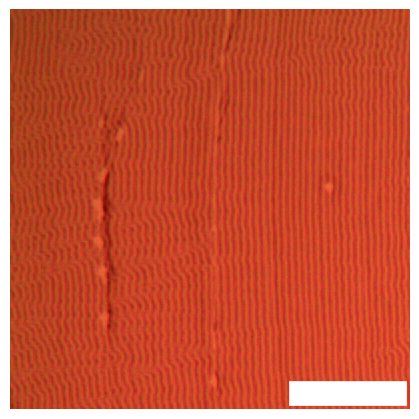

0.057861326015


In [70]:
i = 11
ci = 0
img = misc.imread(image_files[i])
x1=x1_list[ci]
y1=y1_list[ci]
crop_img = img[y1:y1+width,x1:x1+width]

crop_img = exposure.rescale_intensity(crop_img, in_range='image')
#crop_img = constantMeanContrast(crop_img,1.15)
#crop_img = exposure.equalize_hist(crop_img)
fig,ax = plt.subplots(figsize=(4,crop_img.shape[0]/crop_img.shape[1]*4))
ax.imshow(crop_img)
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax.axis('tight')
ax.axis('off')
hideAxes(ax)
add_scalebar(ax,length=20,unit='um',mag='50x',
             show_label=False,height=35)
plt.savefig(os.path.join('FFT Trials','rep163C_i='+str(i)+'_ci='+str(ci)+'.png'),dpi=300)
plt.show()

d=d_from_fft(crop_img,order=15,d_upper=2)
wavelength=1/d['k']
norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
range_idx = np.logical_and(wavelength<4,wavelength>2)
radial=d['radial']
norm_fft=radial/np.amax(radial[norm_range_idx])
avg_fft_2_to_4_um = np.mean(norm_fft[range_idx])
print(avg_fft_2_to_4_um)

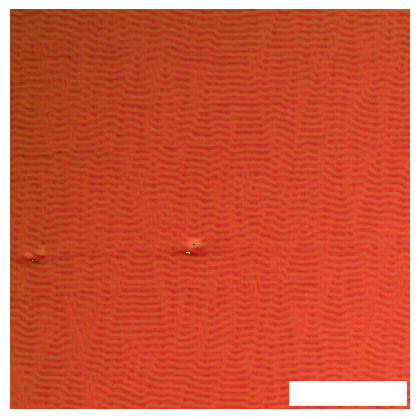

0.0867401521093


In [88]:
i = 4
ci = 0
img = misc.imread(image_files[i])
x1=x1_list[ci]
y1=y1_list[ci]
crop_img = img[y1:y1+width,x1:x1+width]
d=d_from_fft(crop_img,order=15,d_upper=2)
crop_img = exposure.rescale_intensity(crop_img, in_range='image')
crop_img = constantMeanContrast(crop_img,1.1)
#crop_img = exposure.equalize_hist(crop_img)
fig,ax = plt.subplots(figsize=(4,crop_img.shape[0]/crop_img.shape[1]*4))
ax.imshow(crop_img)
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax.axis('tight')
ax.axis('off')
hideAxes(ax)
add_scalebar(ax,length=20,unit='um',mag='50x',
             show_label=False,height=35)
plt.savefig(os.path.join('FFT Trials','rep163C_i='+str(i)+'_ci='+str(ci)+'.png'),dpi=300)
plt.show()


wavelength=1/d['k']
norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
range_idx = np.logical_and(wavelength<4,wavelength>2)
radial=d['radial']
norm_fft=radial/np.amax(radial[norm_range_idx])
avg_fft_2_to_4_um = np.mean(norm_fft[range_idx])
print(avg_fft_2_to_4_um)

In [ ]:
fig,ax = plt.subplots()
ax.imshow(crop_img)
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax.axis('tight')
ax.axis('off')
hideAxes(ax)
add_scalebar(ax,length=20,unit='um',mag='50x',
             show_label=False,height=35)
#matplotlib.rc('axes',edgecolor='white')
#plt.text(20,50,'(b)',fontsize=16,color='white',fontweight='bold')
# plt.text(20,50,'(b) 163 $^{\circ}$C',fontsize=16,color='k',
#         bbox=dict(facecolor='white', alpha=0.4))
plt.savefig(os.path.join('FFT Trials','Fig1b_163C'),dpi=300)
plt.show()

In [47]:
multi_crop_average_fft_2_to_4_um=[]
wavelength=1/after_crop['k']
norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
norm_fft = after_crop['radial']/np.amax(after_crop['radial'][norm_range_idx])
range_idx = np.logical_and(wavelength<4,wavelength>2)
ref_avg = np.mean(norm_fft[range_idx])
for i,d in enumerate(disordered_multi):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    range_idx = np.logical_and(wavelength<4,wavelength>2)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    multi_crop_average_fft_2_to_4_um.append(np.mean(norm_fft[range_idx]))

In [35]:
len(multi_crop_average_fft_2_to_4_um)

80

In [74]:
np.median(multi_crop_average_fft_2_to_4_um)

0.092171890457668271

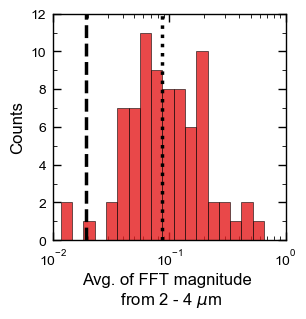

In [81]:
fig,ax=plt.subplots(figsize=(3,3))
nbins=35
upper=2
lower=1e-3
plt.hist(multi_crop_average_fft_2_to_4_um,edgecolor='k',label='Si/Au/TPBi',
         bins=np.logspace(np.log10(lower),np.log10(upper), nbins),alpha=0.8)
plt.plot([ref_avg,ref_avg],[0,20],'--k')
plt.plot([0.087,0.087],[0,20],':k')
plt.xlabel('Avg. of FFT magnitude \n from 2 - 4 $\mu$m')
plt.ylabel('Counts')
plt.xscale('log')
plt.axis([1e-2,1e0,0,12])
#plt.xlim(1e-2,1e0)
#plt.ylim(0,8)
setNiceTicks(plt.gca(),Ny=6,Nx=7,logx=True)
plt.savefig(os.path.join('FFT Trials','FFT-histogram-multiple-crop-regions.png'),bbox_inches='tight',dpi=300)

## Dependence on crop

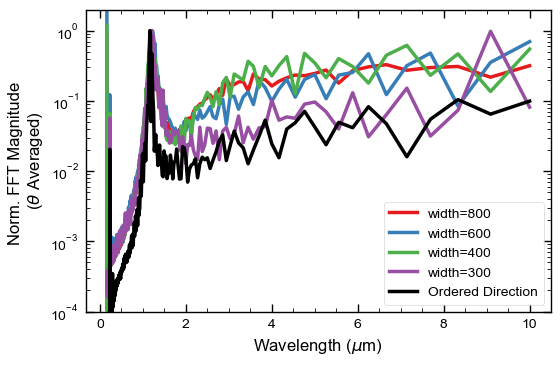

In [69]:
crop_test=[]
width_list = [800,600,400,300]
x1=0
y1=200
for i,w in enumerate(width_list):
    # Load file
    rot_img = misc.imread(image_files[3])
    # Rotate
    #rot_img = rotate(rot_img,angle=rotation[i])
    # Crop - image[y1:y2,x1:x2]
    width = 600
    y1 = y1_list[i]
    x1=x1_list[i]
    rot_img = rot_img[y1:y1+w,x1:x1+w]
    crop_test.append(d_from_fft(rot_img,order=15,d_upper=2))
for i,d in enumerate(crop_test):
    norm_range_idx = np.logical_and((1/d['k'])<2.5,(1/d['k'])>.8)
    plt.semilogy(1/d['k'],d['radial']/np.amax(d['radial'][norm_range_idx]),label='width='+str(width_list[i]))
norm_range_idx = np.logical_and((1/after_crop['k'])<2.5,(1/after_crop['k'])>.8)
plt.semilogy(1/after_crop['k'],after_crop['radial']/np.amax(after_crop['radial'][norm_range_idx]),'k',label='Ordered Direction')
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Norm. FFT Magnitude \n' +  r'($\theta$ Averaged)')
plt.ylim([1e-4,2])
plt.legend()
plt.savefig(os.path.join('FFT Trials','large_set_fft_analysis','Ordered_vs_disordered_ffts.png'),dpi=300,bbox_inches='tight')

# Quality of Au/TPBi and Si/TPBi
For the below images, I'm reporting temperatures 5C higher than the hotplate setpoint (which is recorded in the file and folder names). I.E. 160C becomes 165C, etc. I'm assigning this based on the wavelength of these patterns and the onset of the feathered phase (usually we don't see any until ~169-170C), as I think this is the most consistent with the rest of our data. It's possible that the hotplates were only running 1-3 C high (Jack measured this and saw that temperatures tended to be above the setpoint), and that our other stage was running 1-2 C low, yielding a net swing of 2-5 C. We have previously observed that the hotplates in the glovebox run hotter than the microscope heated stage, and trends are consistently shifted by 2-5C.

We ran these on the hotplate, rather than the microscope stage, because we didn't need to measure growth rate and to improve throughput.

## 160 C

In [72]:
wavelength=1/after_crop['k']
norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
norm_fft = after_crop['radial']/np.amax(after_crop['radial'][norm_range_idx])
range_idx = np.logical_and(wavelength<4,wavelength>2)
ref_avg = np.mean(norm_fft[range_idx])

In [41]:
# Au/TPBi analysis without cropping 160C
# Images to analyze
thicknessDir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_Au_TPBi','160C')
image_files = glob.glob(os.path.join(thicknessDir,'*.tif'))
#image_files = [os.path.join(thicknessDir,x) for x in image_files]
# Loop through and calculate FFTs
au_160C_fft_no_crop=[]
for i,image_file in enumerate(image_files):
    # Load file
    rot_img = misc.imread(image_file)
    # Improve contrast
    rot_img = exposure.equalize_hist(rot_img)
    au_160C_fft_no_crop.append(d_from_fft(rot_img,order=15,d_upper=2))
# average the portion of the fft spectrum between 2 and 4 microns
# and plot a histogram
au_160C_average_fft_2_to_4_um=[]
for i,d in enumerate(au_160C_fft_no_crop):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    avg_range_idx = np.logical_and(wavelength<4,wavelength>2)
    au_160C_average_fft_2_to_4_um.append(np.mean(norm_fft[avg_range_idx]))

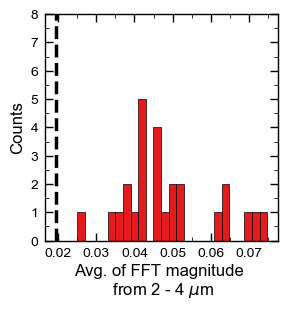

In [73]:
# Plot analysis without cropping Au/TPBi 160C
fig,ax=plt.subplots(figsize=(3,3))
plt.hist(au_160C_average_fft_2_to_4_um,bins=25,edgecolor='k')
plt.plot([ref_avg,ref_avg],[0,8],'--k')
plt.xlabel('Avg. of FFT magnitude \n from 2 - 4 $\mu$m')
plt.ylabel('Counts')
#plt.xscale('log')
plt.ylim(0,8)
setNiceTicks(plt.gca(),Ny=8,Nx=7)
plt.savefig(os.path.join('FFT Trials','Au-TPBi_FFT-histogram-without-crop.png'),bbox_inches='tight',dpi=300)

In [43]:
# Si/TPBi analysis without cropping 160C
# Images to analyze
thicknessDir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_TPBi','Si','160C')
image_files = glob.glob(os.path.join(thicknessDir,'*.tif'))
#image_files = [os.path.join(thicknessDir,x) for x in image_files]
# Loop through and calculate FFTs
Si_160C_no_crop=[]
for i,image_file in enumerate(image_files):
    # Load file
    rot_img = misc.imread(image_file)
    # Improve contrast
    rot_img = exposure.equalize_hist(rot_img)
    Si_160C_no_crop.append(d_from_fft(rot_img,order=15,d_upper=2))
# average the portion of the fft spectrum between 2 and 4 microns
# and plot a histogram
Si_160C_average_fft_2_to_4_um=[]
wavelength=1/after_crop['k']
norm_fft = after_crop['radial']/np.amax(after_crop['radial'])
range_idx = np.logical_and(wavelength<4,wavelength>2)
ref_avg = np.mean(norm_fft[range_idx])
for i,d in enumerate(Si_160C_no_crop):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    avg_range_idx = np.logical_and(wavelength<4,wavelength>2)
    Si_160C_average_fft_2_to_4_um.append(np.mean(norm_fft[avg_range_idx]))

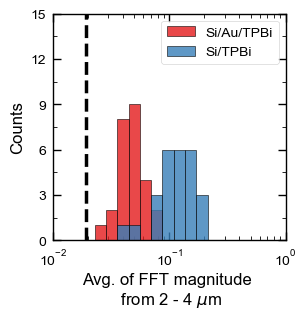

In [74]:
# Plot analysis without cropping Si/TPBi 160C
fig,ax=plt.subplots(figsize=(3,3))
nbins=35
upper=2
lower=1e-3
plt.hist(au_160C_average_fft_2_to_4_um,edgecolor='k',label='Si/Au/TPBi',
         bins=np.logspace(np.log10(lower),np.log10(upper), nbins),alpha=0.8)
         #bins=np.arange(np.amin(au_160C_average_fft_2_to_4_um), np.amax(Si_160C_average_fft_2_to_4_um) + binwidth,binwidth))
binwidth=0.005
plt.hist(Si_160C_average_fft_2_to_4_um,edgecolor='k',label='Si/TPBi',
         bins=np.logspace(np.log10(lower),np.log10(upper), nbins),alpha=0.8)
         #bins=np.arange(np.amin(au_160C_average_fft_2_to_4_um), np.amax(Si_160C_average_fft_2_to_4_um) + binwidth, binwidth))
plt.plot([ref_avg,ref_avg],[0,15],'--k')
plt.xlabel('Avg. of FFT magnitude \n from 2 - 4 $\mu$m')
plt.ylabel('Counts')
plt.xscale('log')
#plt.ylim(0,8)
ax.axis([1e-2,1,0,15])
setNiceTicks(plt.gca(),Ny=5,Nx=7,logx=True)
plt.legend()
plt.savefig(os.path.join('FFT Trials','Si-TPBi_vs_Au-TPBi_160C_FFT-histogram-without-crop.png'),bbox_inches='tight',dpi=300)

## 165 C

In [38]:
# Au/TPBi analysis without cropping 165C
# Images to analyze
thicknessDir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_Au_TPBi','165C')
image_files = glob.glob(os.path.join(thicknessDir,'*.tif'))
#image_files = [os.path.join(thicknessDir,x) for x in image_files]
# Loop through and calculate FFTs
au_165C_fft_no_crop=[]
for i,image_file in enumerate(image_files):
    # Load file
    rot_img = misc.imread(image_file)
    # Improve contrast
    rot_img = exposure.equalize_hist(rot_img)
    au_165C_fft_no_crop.append(d_from_fft(rot_img,order=15,d_upper=2))
# average the portion of the fft spectrum between 2 and 4 microns
# and plot a histogram
au_165C_average_fft_2_to_4_um=[]
wavelength=1/after_crop['k']
norm_fft = after_crop['radial']/np.amax(after_crop['radial'])
range_idx = np.logical_and(wavelength<4,wavelength>2)
ref_avg = np.mean(norm_fft[range_idx])
for i,d in enumerate(au_165C_fft_no_crop):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    avg_range_idx = np.logical_and(wavelength<4,wavelength>2)
    au_165C_average_fft_2_to_4_um.append(np.mean(norm_fft[avg_range_idx]))

In [39]:
# Si/TPBi analysis without cropping 165C
# Images to analyze
thicknessDir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_TPBi','Si','165C')
image_files = glob.glob(os.path.join(thicknessDir,'*.tif'))
#image_files = [os.path.join(thicknessDir,x) for x in image_files]
# Loop through and calculate FFTs
Si_165C_no_crop=[]
for i,image_file in enumerate(image_files):
    # Load file
    rot_img = misc.imread(image_file)
    # Improve contrast
    rot_img = exposure.equalize_hist(rot_img)
    Si_165C_no_crop.append(d_from_fft(rot_img,order=15,d_upper=2))
# average the portion of the fft spectrum between 2 and 4 microns
# and plot a histogram
Si_165C_average_fft_2_to_4_um=[]
wavelength=1/after_crop['k']
norm_fft = after_crop['radial']/np.amax(after_crop['radial'])
range_idx = np.logical_and(wavelength<4,wavelength>2)
ref_avg = np.mean(norm_fft[range_idx])
for i,d in enumerate(Si_165C_no_crop):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    avg_range_idx = np.logical_and(wavelength<4,wavelength>2)
    Si_165C_average_fft_2_to_4_um.append(np.mean(norm_fft[avg_range_idx]))

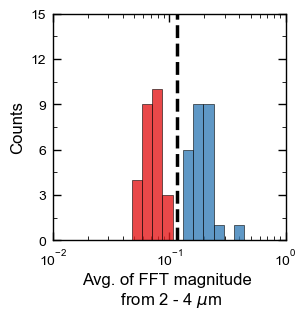

In [55]:
# Plot analysis without cropping Si/TPBi 165C
fig,ax=plt.subplots(figsize=(3,3))
nbins=35
upper=1
lower=1e-3
plt.hist(au_165C_average_fft_2_to_4_um,edgecolor='k',
         bins=np.logspace(np.log10(lower),np.log10(upper), nbins),alpha=0.8)
         #bins=np.arange(np.amin(au_160C_average_fft_2_to_4_um), np.amax(Si_160C_average_fft_2_to_4_um) + binwidth,binwidth))
plt.hist(Si_165C_average_fft_2_to_4_um,edgecolor='k',
         bins=np.logspace(np.log10(lower),np.log10(upper), nbins),alpha=0.8)
         #bins=np.arange(np.amin(au_160C_average_fft_2_to_4_um), np.amax(Si_160C_average_fft_2_to_4_um) + binwidth, binwidth))
plt.plot([ref_avg,ref_avg],[0,15],'--k')
plt.xlabel('Avg. of FFT magnitude \n from 2 - 4 $\mu$m')
plt.ylabel('Counts')
plt.xscale('log')
#plt.ylim(0,8)
ax.axis([8e-3,0.3,0,9])
ax.axis([1e-2,1,0,15])
setNiceTicks(plt.gca(),Ny=5,Nx=7,logx=True)
plt.savefig(os.path.join('FFT Trials','Si-TPBi_vs_Au-TPBi_165C_FFT-histogram-without-crop.png'),bbox_inches='tight',dpi=300)

## 170 C

In [25]:
 # Au/TPBi analysis without cropping 170C
# Images to analyze
thicknessDir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_Au_TPBi','170C')
image_files = glob.glob(os.path.join(thicknessDir,'*.tif'))
#image_files = [os.path.join(thicknessDir,x) for x in image_files]
Loop through and calculate FFTs
au_170C_fft_no_crop=[]
for i,image_file in enumerate(image_files):
    # Load file
    rot_img = misc.imread(image_file)
    # Improve contrast
    rot_img = exposure.equalize_hist(rot_img)
    au_170C_fft_no_crop.append(d_from_fft(rot_img,order=15,d_upper=2))
# average the portion of the fft spectrum between 2 and 4 microns
# and plot a histogram
au_170C_average_fft_2_to_4_um=[]
wavelength=1/after_crop['k']
norm_fft = after_crop['radial']/np.amax(after_crop['radial'])
range_idx = np.logical_and(wavelength<4,wavelength>2)
ref_avg = np.mean(norm_fft[range_idx])
for i,d in enumerate(au_170C_fft_no_crop):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    avg_range_idx = np.logical_and(wavelength<4,wavelength>2)
    au_170C_average_fft_2_to_4_um.append(np.mean(norm_fft[avg_range_idx]))

In [26]:
# Si/TPBi analysis without cropping 170C
# Images to analyze
thicknessDir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_TPBi','Si','170C')
image_files = glob.glob(os.path.join(thicknessDir,'*.tif'))
#image_files = [os.path.join(thicknessDir,x) for x in image_files]
# Loop through and calculate FFTs
Si_170C_no_crop=[]
for i,image_file in enumerate(image_files):
    # Load file
    rot_img = misc.imread(image_file)
    # Improve contrast
    rot_img = exposure.equalize_hist(rot_img)
    Si_170C_no_crop.append(d_from_fft(rot_img,order=15,d_upper=2))
# average the portion of the fft spectrum between 2 and 4 microns
# and plot a histogram
Si_170C_average_fft_2_to_4_um=[]
wavelength=1/after_crop['k']
norm_fft = after_crop['radial']/np.amax(after_crop['radial'])
range_idx = np.logical_and(wavelength<4,wavelength>2)
ref_avg = np.mean(norm_fft[range_idx])
for i,d in enumerate(Si_170C_no_crop):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    avg_range_idx = np.logical_and(wavelength<4,wavelength>2)
    Si_170C_average_fft_2_to_4_um.append(np.mean(norm_fft[avg_range_idx]))

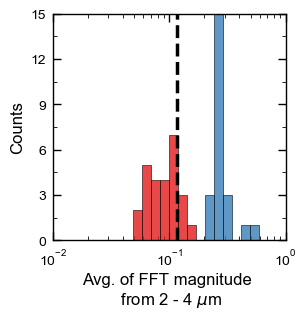

In [56]:
# Plot analysis without cropping Si/TPBi 170C
fig,ax=plt.subplots(figsize=(3,3))
nbins=40
upper=1
lower=1e-3
plt.hist(au_170C_average_fft_2_to_4_um,edgecolor='k',
         bins=np.logspace(np.log10(lower),np.log10(upper), nbins),alpha=0.8)
         #bins=np.arange(np.amin(au_160C_average_fft_2_to_4_um), np.amax(Si_160C_average_fft_2_to_4_um) + binwidth,binwidth))
plt.hist(Si_170C_average_fft_2_to_4_um,edgecolor='k',
         bins=np.logspace(np.log10(lower),np.log10(upper), nbins),alpha=0.8)
         #bins=np.arange(np.amin(au_160C_average_fft_2_to_4_um), np.amax(Si_160C_average_fft_2_to_4_um) + binwidth, binwidth))
plt.plot([ref_avg,ref_avg],[0,15],'--k')
plt.xlabel('Avg. of FFT magnitude \n from 2 - 4 $\mu$m')
plt.ylabel('Counts')
plt.xscale('log')
#plt.ylim(0,8)
ax.axis([8e-3,0.8,0,10])
ax.axis([1e-2,1,0,15])
setNiceTicks(plt.gca(),Ny=5,Nx=7,logx=True)
plt.savefig(os.path.join('FFT Trials','Si-TPBi_vs_Au-TPBi_170C_FFT-histogram-without-crop.png'),bbox_inches='tight',dpi=300)

# Au quality with crop

## 160C

In [36]:
# Au/TPBi analysis with cropping 160C
# Images to analyze
thicknessDir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_Au_TPBi','160C')
image_files = glob.glob(os.path.join(thicknessDir,'*.tif'))
#image_files = [os.path.join(thicknessDir,x) for x in image_files]
# Loop through and calculate FFTs
au_160C_fft=[]
y1=600
x1=0
width=600
for i,image_file in enumerate(image_files):
    # Load file
    rot_img = misc.imread(image_file)
    # Improve contrast
    rot_img = exposure.equalize_hist(rot_img[y1:y1+width,x1:x1+width])
    au_160C_fft.append(d_from_fft(rot_img,order=15,d_upper=2))
# average the portion of the fft spectrum between 2 and 4 microns
# and plot a histogram
au_160C_average_fft_2_to_4_um=[]
for i,d in enumerate(au_160C_fft):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    avg_range_idx = np.logical_and(wavelength<4,wavelength>2)
    au_160C_average_fft_2_to_4_um.append(np.mean(norm_fft[avg_range_idx]))

In [37]:
# Si/TPBi analysis with cropping 160C
# Images to analyze
thicknessDir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_TPBi','Si','160C')
image_files = glob.glob(os.path.join(thicknessDir,'*.tif'))
#image_files = [os.path.join(thicknessDir,x) for x in image_files]
# Loop through and calculate FFTs
Si_160C=[]
y1=600
x1=0
width=600
for i,image_file in enumerate(image_files):
    # Load file
    rot_img = misc.imread(image_file)
    # Improve contrast
    rot_img = exposure.equalize_hist(rot_img[y1:y1+width,x1:x1+width])
    Si_160C.append(d_from_fft(rot_img,order=15,d_upper=2))
# average the portion of the fft spectrum between 2 and 4 microns
# and plot a histogram
Si_160C_average_fft_2_to_4_um=[]
wavelength=1/after_crop['k']
norm_fft = after_crop['radial']/np.amax(after_crop['radial'])
range_idx = np.logical_and(wavelength<4,wavelength>2)
ref_avg = np.mean(norm_fft[range_idx])
for i,d in enumerate(Si_160C):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    avg_range_idx = np.logical_and(wavelength<4,wavelength>2)
    Si_160C_average_fft_2_to_4_um.append(np.mean(norm_fft[avg_range_idx]))

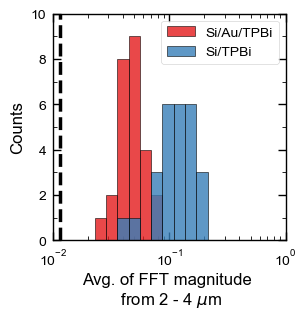

In [50]:
# Plot analysis without cropping Si/TPBi 160C
fig,ax=plt.subplots(figsize=(3,3))
nbins=35
upper=2
lower=1e-3
plt.hist(au_160C_average_fft_2_to_4_um,edgecolor='k',label='Si/Au/TPBi',
         bins=np.logspace(np.log10(lower),np.log10(upper), nbins),alpha=0.8)
         #bins=np.arange(np.amin(au_160C_average_fft_2_to_4_um), np.amax(Si_160C_average_fft_2_to_4_um) + binwidth,binwidth))
binwidth=0.005
plt.hist(Si_160C_average_fft_2_to_4_um,edgecolor='k',label='Si/TPBi',
         bins=np.logspace(np.log10(lower),np.log10(upper), nbins),alpha=0.8)
         #bins=np.arange(np.amin(au_160C_average_fft_2_to_4_um), np.amax(Si_160C_average_fft_2_to_4_um) + binwidth, binwidth))
plt.plot([ref_avg,ref_avg],[0,15],'--k')
plt.xlabel('Avg. of FFT magnitude \n from 2 - 4 $\mu$m')
plt.ylabel('Counts')
plt.xscale('log')
#plt.ylim(0,8)
ax.axis([1e-2,1,0,10])
setNiceTicks(plt.gca(),Ny=5,Nx=7,logx=True)
plt.legend()
plt.savefig(os.path.join('FFT Trials','Si-TPBi_vs_Au-TPBi_160C_FFT-histogram-with-crop.png'),bbox_inches='tight',dpi=300)

## 165 C

In [16]:
%matplotlib inline

In [11]:
wavelength=1/after_crop['k']
norm_fft = after_crop['radial']/np.amax(after_crop['radial'])
range_idx = np.logical_and(wavelength<4,wavelength>2)
ref_avg = np.mean(norm_fft[range_idx])

In [40]:
# Au/TPBi analysis with cropping 165C
# Images to analyze
thicknessDir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_Au_TPBi','165C')
image_files = glob.glob(os.path.join(thicknessDir,'*.tif'))
#image_files = [os.path.join(thicknessDir,x) for x in image_files]
# Loop through and calculate FFTs
au_165C_fft=[]
y1=600
x1=0
width=600
for i,image_file in enumerate(image_files):
    # Load file
    rot_img = misc.imread(image_file)
    # Improve contrast
    rot_img = exposure.equalize_hist(rot_img[y1:y1+width,x1:x1+width])
    au_165C_fft.append(d_from_fft(rot_img,order=15,d_upper=2))
# average the portion of the fft spectrum between 2 and 4 microns
# and plot a histogram
au_165C_average_fft_2_to_4_um=[]
for i,d in enumerate(au_165C_fft):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    avg_range_idx = np.logical_and(wavelength<4,wavelength>2)
    au_165C_average_fft_2_to_4_um.append(np.mean(norm_fft[avg_range_idx]))

In [14]:
# Si/TPBi analysis with cropping 165C
# Images to analyze
thicknessDir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_TPBi','Si','165C')
image_files = glob.glob(os.path.join(thicknessDir,'*.tif'))
#image_files = [os.path.join(thicknessDir,x) for x in image_files]
# Loop through and calculate FFTs
Si_165C_no_crop=[]
y1=600
x1=0
width=600
for i,image_file in enumerate(image_files):
    # Load file
    rot_img = misc.imread(image_file)
    # Improve contrast
    rot_img = exposure.equalize_hist(rot_img[y1:y1+width,x1:x1+width])
    Si_165C_no_crop.append(d_from_fft(rot_img,order=15,d_upper=2))
# average the portion of the fft spectrum between 2 and 4 microns
# and plot a histogram
Si_165C_average_fft_2_to_4_um=[]
wavelength=1/after_crop['k']
norm_fft = after_crop['radial']/np.amax(after_crop['radial'])
range_idx = np.logical_and(wavelength<4,wavelength>2)
ref_avg = np.mean(norm_fft[range_idx])
for i,d in enumerate(Si_165C_no_crop):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    avg_range_idx = np.logical_and(wavelength<4,wavelength>2)
    Si_165C_average_fft_2_to_4_um.append(np.mean(norm_fft[avg_range_idx]))

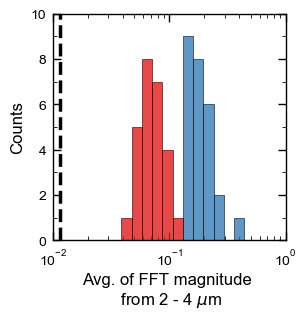

In [49]:
# Plot analysis with cropping 165C
fig,ax=plt.subplots(figsize=(3,3))
nbins=35
upper=1
lower=1e-3
plt.hist(au_165C_average_fft_2_to_4_um,edgecolor='k',
         bins=np.logspace(np.log10(lower),np.log10(upper), nbins),alpha=0.8)
         #bins=np.arange(np.amin(au_160C_average_fft_2_to_4_um), np.amax(Si_160C_average_fft_2_to_4_um) + binwidth,binwidth))
plt.hist(Si_165C_average_fft_2_to_4_um,edgecolor='k',
         bins=np.logspace(np.log10(lower),np.log10(upper), nbins),alpha=0.8)
         #bins=np.arange(np.amin(au_160C_average_fft_2_to_4_um), np.amax(Si_160C_average_fft_2_to_4_um) + binwidth, binwidth))
plt.plot([ref_avg,ref_avg],[0,15],'--k')
plt.xlabel('Avg. of FFT magnitude \n from 2 - 4 $\mu$m')
plt.ylabel('Counts')
plt.xscale('log')
#plt.ylim(0,8)
ax.axis([8e-3,0.3,0,9])
ax.axis([1e-2,1,0,10])
setNiceTicks(plt.gca(),Ny=5,Nx=7,logx=True)
plt.savefig(os.path.join('FFT Trials','Si-TPBi_vs_Au-TPBi_165C_FFT-histogram-with-crop.png'),bbox_inches='tight',dpi=300)

## 170C

In [43]:
 # Au/TPBi analysis without cropping 170C
# Images to analyze
thicknessDir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_Au_TPBi','170C')
image_files = glob.glob(os.path.join(thicknessDir,'*.tif'))
#image_files = [os.path.join(thicknessDir,x) for x in image_files]
#Loop through and calculate FFTs
au_170C_fft=[]
y1=600
x1=0
width=600
for i,image_file in enumerate(image_files):
    # Load file
    rot_img = misc.imread(image_file)
    # Improve contrast
    rot_img = exposure.equalize_hist(rot_img[y1:y1+width,x1:x1+width])
    au_170C_fft.append(d_from_fft(rot_img,order=15,d_upper=2))
# average the portion of the fft spectrum between 2 and 4 microns
# and plot a histogram
au_170C_average_fft_2_to_4_um=[]
wavelength=1/after_crop['k']
norm_fft = after_crop['radial']/np.amax(after_crop['radial'])
range_idx = np.logical_and(wavelength<4,wavelength>2)
ref_avg = np.mean(norm_fft[range_idx])
for i,d in enumerate(au_170C_fft):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    avg_range_idx = np.logical_and(wavelength<4,wavelength>2)
    au_170C_average_fft_2_to_4_um.append(np.mean(norm_fft[avg_range_idx]))

In [44]:
# Si/TPBi analysis without cropping 170C
# Images to analyze
thicknessDir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_TPBi','Si','170C')
image_files = glob.glob(os.path.join(thicknessDir,'*.tif'))
#image_files = [os.path.join(thicknessDir,x) for x in image_files]
# Loop through and calculate FFTs
Si_170C=[]
y1=600
x1=0
width=600
for i,image_file in enumerate(image_files):
    # Load file
    rot_img = misc.imread(image_file)
    # Improve contrast
    rot_img = exposure.equalize_hist(rot_img[y1:y1+width,x1:x1+width])
    Si_170C.append(d_from_fft(rot_img,order=15,d_upper=2))
# average the portion of the fft spectrum between 2 and 4 microns
# and plot a histogram
Si_170C_average_fft_2_to_4_um=[]
wavelength=1/after_crop['k']
norm_fft = after_crop['radial']/np.amax(after_crop['radial'])
range_idx = np.logical_and(wavelength<4,wavelength>2)
ref_avg = np.mean(norm_fft[range_idx])
for i,d in enumerate(Si_170C):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    avg_range_idx = np.logical_and(wavelength<4,wavelength>2)
    Si_170C_average_fft_2_to_4_um.append(np.mean(norm_fft[avg_range_idx]))

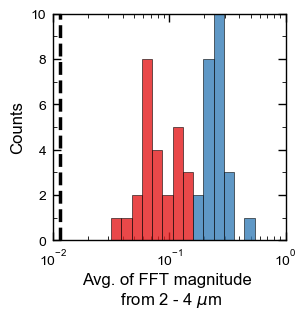

In [51]:
# Plot analysis without cropping Si/TPBi 170C
fig,ax=plt.subplots(figsize=(3,3))
nbins=35
upper=1
lower=1e-3
plt.hist(au_170C_average_fft_2_to_4_um,edgecolor='k',
         bins=np.logspace(np.log10(lower),np.log10(upper), nbins),alpha=0.8)
         #bins=np.arange(np.amin(au_160C_average_fft_2_to_4_um), np.amax(Si_160C_average_fft_2_to_4_um) + binwidth,binwidth))
plt.hist(Si_170C_average_fft_2_to_4_um,edgecolor='k',
         bins=np.logspace(np.log10(lower),np.log10(upper), nbins),alpha=0.8)
         #bins=np.arange(np.amin(au_160C_average_fft_2_to_4_um), np.amax(Si_160C_average_fft_2_to_4_um) + binwidth, binwidth))
plt.plot([ref_avg,ref_avg],[0,15],'--k')
plt.xlabel('Avg. of FFT magnitude \n from 2 - 4 $\mu$m')
plt.ylabel('Counts')
plt.xscale('log')
#plt.ylim(0,8)
ax.axis([8e-3,0.8,0,10])
ax.axis([1e-2,1,0,10])
setNiceTicks(plt.gca(),Ny=5,Nx=7,logx=True)
plt.savefig(os.path.join('FFT Trials','Si-TPBi_vs_Au-TPBi_170C_FFT-histogram-with-crop.png'),bbox_inches='tight',dpi=300)

# Au quality with multi crop

## 160C

In [25]:
# Au/TPBi analysis with cropping 160C
# Images to analyze
thicknessDir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_Au_TPBi','160C')
image_files = glob.glob(os.path.join(thicknessDir,'*.tif'))
#image_files = [os.path.join(thicknessDir,x) for x in image_files]
# Loop through and calculate FFTs
au_160C_fft=[]
x1_list=[0,0,600,600,1200,1200]
y1_list=[0,600,0,600,0,600]
width = 600
for i,image_file in enumerate(image_files):
    # Load file
    img = misc.imread(image_file)
    for ci,y1 in enumerate(y1_list):
        x1=x1_list[ci]
        crop_img = img[y1:y1+width,x1:x1+width]
        au_160C_fft.append(d_from_fft(crop_img,order=15,d_upper=2))
# average the portion of the fft spectrum between 2 and 4 microns
# and plot a histogram
au_160C_average_fft_2_to_4_um=[]
for i,d in enumerate(au_160C_fft):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    avg_range_idx = np.logical_and(wavelength<4,wavelength>2)
    au_160C_average_fft_2_to_4_um.append(np.mean(norm_fft[avg_range_idx]))

In [26]:
# Si/TPBi analysis with cropping 160C
# Images to analyze
thicknessDir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_TPBi','Si','160C')
image_files = glob.glob(os.path.join(thicknessDir,'*.tif'))
#image_files = [os.path.join(thicknessDir,x) for x in image_files]
# Loop through and calculate FFTs
Si_160C=[]
x1_list=[0,0,600,600,1200,1200]
y1_list=[0,600,0,600,0,600]
width = 600
for i,image_file in enumerate(image_files):
    # Load file
    img = misc.imread(image_file)
    for ci,y1 in enumerate(y1_list):
        x1=x1_list[ci]
        crop_img = img[y1:y1+width,x1:x1+width]
        Si_160C.append(d_from_fft(crop_img,order=15,d_upper=2))
# average the portion of the fft spectrum between 2 and 4 microns
# and plot a histogram
Si_160C_average_fft_2_to_4_um=[]
wavelength=1/after_crop['k']
norm_fft = after_crop['radial']/np.amax(after_crop['radial'])
range_idx = np.logical_and(wavelength<4,wavelength>2)
ref_avg = np.mean(norm_fft[range_idx])
for i,d in enumerate(Si_160C):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    avg_range_idx = np.logical_and(wavelength<4,wavelength>2)
    Si_160C_average_fft_2_to_4_um.append(np.mean(norm_fft[avg_range_idx]))

In [37]:
print(len(Si_160C_average_fft_2_to_4_um))
print(len(au_160C_average_fft_2_to_4_um))
print(len(Si_165C_average_fft_2_to_4_um))
print(len(au_160C_average_fft_2_to_4_um))
print(len(Si_170C_average_fft_2_to_4_um))
print(len(au_160C_average_fft_2_to_4_um))

156
156
156
156
156
156


In [27]:
%matplotlib inline

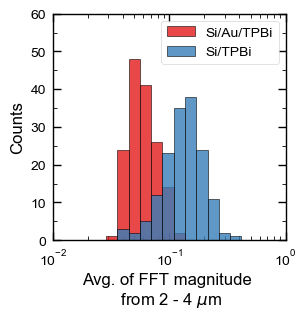

In [28]:
# Plot analysis without cropping Si/TPBi 160C
fig,ax=plt.subplots(figsize=(3,3))
nbins=35
upper=2
lower=1e-3
plt.hist(au_160C_average_fft_2_to_4_um,edgecolor='k',label='Si/Au/TPBi',
         bins=np.logspace(np.log10(lower),np.log10(upper), nbins),alpha=0.8)
         #bins=np.arange(np.amin(au_160C_average_fft_2_to_4_um), np.amax(Si_160C_average_fft_2_to_4_um) + binwidth,binwidth))
binwidth=0.005
plt.hist(Si_160C_average_fft_2_to_4_um,edgecolor='k',label='Si/TPBi',
         bins=np.logspace(np.log10(lower),np.log10(upper), nbins),alpha=0.8)
         #bins=np.arange(np.amin(au_160C_average_fft_2_to_4_um), np.amax(Si_160C_average_fft_2_to_4_um) + binwidth, binwidth))
#plt.plot([ref_avg,ref_avg],[0,60],'--k')
plt.xlabel('Avg. of FFT magnitude \n from 2 - 4 $\mu$m')
plt.ylabel('Counts')
plt.xscale('log')
plt.xlim(1e-2,1)
plt.ylim(0,60)
#ax.axis([1e-2,1,0,10])
setNiceTicks(plt.gca(),Ny=6,Nx=7,logx=True)
plt.legend()
plt.savefig(os.path.join('FFT Trials','Si-TPBi_vs_Au-TPBi_160C_FFT-histogram-with-multi-crop.png'),bbox_inches='tight',dpi=300)

## 165 C

In [29]:
# Au/TPBi analysis with cropping 165C
# Images to analyze
thicknessDir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_Au_TPBi','165C')
image_files = glob.glob(os.path.join(thicknessDir,'*.tif'))
#image_files = [os.path.join(thicknessDir,x) for x in image_files]
# Loop through and calculate FFTs
au_165C_fft=[]
x1_list=[0,0,600,600,1200,1200]
y1_list=[0,600,0,600,0,600]
width = 600
for i,image_file in enumerate(image_files):
    # Load file
    img = misc.imread(image_file)
    for ci,y1 in enumerate(y1_list):
        x1=x1_list[ci]
        crop_img = img[y1:y1+width,x1:x1+width]
        au_165C_fft.append(d_from_fft(crop_img,order=15,d_upper=2))
# average the portion of the fft spectrum between 2 and 4 microns
# and plot a histogram
au_165C_average_fft_2_to_4_um=[]
for i,d in enumerate(au_165C_fft):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    avg_range_idx = np.logical_and(wavelength<4,wavelength>2)
    au_165C_average_fft_2_to_4_um.append(np.mean(norm_fft[avg_range_idx]))

In [30]:
# Si/TPBi analysis with cropping 165C
# Images to analyze
thicknessDir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_TPBi','Si','165C')
image_files = glob.glob(os.path.join(thicknessDir,'*.tif'))
#image_files = [os.path.join(thicknessDir,x) for x in image_files]
# Loop through and calculate FFTs
Si_165C_no_crop=[]
x1_list=[0,0,600,600,1200,1200]
y1_list=[0,600,0,600,0,600]
width = 600
for i,image_file in enumerate(image_files):
    # Load file
    img = misc.imread(image_file)
    for ci,y1 in enumerate(y1_list):
        x1=x1_list[ci]
        crop_img = img[y1:y1+width,x1:x1+width]
        Si_165C_no_crop.append(d_from_fft(crop_img,order=15,d_upper=2))
# average the portion of the fft spectrum between 2 and 4 microns
# and plot a histogram
Si_165C_average_fft_2_to_4_um=[]
wavelength=1/after_crop['k']
norm_fft = after_crop['radial']/np.amax(after_crop['radial'])
range_idx = np.logical_and(wavelength<4,wavelength>2)
ref_avg = np.mean(norm_fft[range_idx])
for i,d in enumerate(Si_165C_no_crop):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    avg_range_idx = np.logical_and(wavelength<4,wavelength>2)
    Si_165C_average_fft_2_to_4_um.append(np.mean(norm_fft[avg_range_idx]))

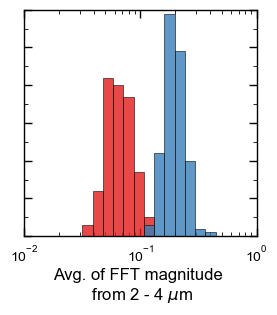

In [31]:
# Plot analysis with cropping 165C
fig,ax=plt.subplots(figsize=(3,3))
nbins=35
upper=1
lower=1e-3
plt.hist(au_165C_average_fft_2_to_4_um,edgecolor='k',
         bins=np.logspace(np.log10(lower),np.log10(upper), nbins),alpha=0.8)
         #bins=np.arange(np.amin(au_160C_average_fft_2_to_4_um), np.amax(Si_160C_average_fft_2_to_4_um) + binwidth,binwidth))
plt.hist(Si_165C_average_fft_2_to_4_um,edgecolor='k',
         bins=np.logspace(np.log10(lower),np.log10(upper), nbins),alpha=0.8)
         #bins=np.arange(np.amin(au_160C_average_fft_2_to_4_um), np.amax(Si_160C_average_fft_2_to_4_um) + binwidth, binwidth))
#plt.plot([ref_avg,ref_avg],[0,60],'--k')
plt.xlabel('Avg. of FFT magnitude \n from 2 - 4 $\mu$m')
#plt.ylabel('Counts')
plt.xscale('log')
plt.xlim(1e-2,1)
plt.ylim(0,60)
#ax.axis([8e-3,0.3,0,9])
#ax.axis([1e-2,1,0,10])
ax.yaxis.set_ticklabels([])
setNiceTicks(plt.gca(),Ny=6,Nx=7,logx=True)
plt.savefig(os.path.join('FFT Trials','Si-TPBi_vs_Au-TPBi_165C_FFT-histogram-with-multicrop.png'),
            bbox_inches='tight',dpi=300,transparent=True)

## 170C

In [32]:
 # Au/TPBi analysis without cropping 170C
# Images to analyze
thicknessDir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_Au_TPBi','170C')
image_files = glob.glob(os.path.join(thicknessDir,'*.tif'))
#image_files = [os.path.join(thicknessDir,x) for x in image_files]
#Loop through and calculate FFTs
au_170C_fft=[]
x1_list=[0,0,600,600,1200,1200]
y1_list=[0,600,0,600,0,600]
width = 600
for i,image_file in enumerate(image_files):
    # Load file
    img = misc.imread(image_file)
    for ci,y1 in enumerate(y1_list):
        x1=x1_list[ci]
        crop_img = img[y1:y1+width,x1:x1+width]
        au_170C_fft.append(d_from_fft(crop_img,order=15,d_upper=2))
# average the portion of the fft spectrum between 2 and 4 microns
# and plot a histogram
au_170C_average_fft_2_to_4_um=[]
wavelength=1/after_crop['k']
norm_fft = after_crop['radial']/np.amax(after_crop['radial'])
range_idx = np.logical_and(wavelength<4,wavelength>2)
ref_avg = np.mean(norm_fft[range_idx])
for i,d in enumerate(au_170C_fft):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    avg_range_idx = np.logical_and(wavelength<4,wavelength>2)
    au_170C_average_fft_2_to_4_um.append(np.mean(norm_fft[avg_range_idx]))

In [33]:
# Si/TPBi analysis without cropping 170C
# Images to analyze
thicknessDir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_TPBi','Si','170C')
image_files = glob.glob(os.path.join(thicknessDir,'*.tif'))
#image_files = [os.path.join(thicknessDir,x) for x in image_files]
# Loop through and calculate FFTs
Si_170C=[]
x1_list=[0,0,600,600,1200,1200]
y1_list=[0,600,0,600,0,600]
width = 600
for i,image_file in enumerate(image_files):
    # Load file
    img = misc.imread(image_file)
    for ci,y1 in enumerate(y1_list):
        x1=x1_list[ci]
        crop_img = img[y1:y1+width,x1:x1+width]
        Si_170C.append(d_from_fft(crop_img,order=15,d_upper=2))
# average the portion of the fft spectrum between 2 and 4 microns
# and plot a histogram
Si_170C_average_fft_2_to_4_um=[]
wavelength=1/after_crop['k']
norm_fft = after_crop['radial']/np.amax(after_crop['radial'])
range_idx = np.logical_and(wavelength<4,wavelength>2)
ref_avg = np.mean(norm_fft[range_idx])
for i,d in enumerate(Si_170C):
    wavelength=1/d['k']
    norm_range_idx = np.logical_and(wavelength<2.5,wavelength>.8)
    norm_fft = d['radial']/np.amax(d['radial'][norm_range_idx])
    avg_range_idx = np.logical_and(wavelength<4,wavelength>2)
    Si_170C_average_fft_2_to_4_um.append(np.mean(norm_fft[avg_range_idx]))

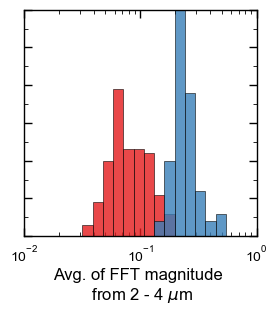

In [34]:
# Plot analysis without cropping Si/TPBi 170C
fig,ax=plt.subplots(figsize=(3,3))
nbins=35
upper=1
lower=1e-3
plt.hist(au_170C_average_fft_2_to_4_um,edgecolor='k',
         bins=np.logspace(np.log10(lower),np.log10(upper), nbins),alpha=0.8)
         #bins=np.arange(np.amin(au_160C_average_fft_2_to_4_um), np.amax(Si_160C_average_fft_2_to_4_um) + binwidth,binwidth))
plt.hist(Si_170C_average_fft_2_to_4_um,edgecolor='k',
         bins=np.logspace(np.log10(lower),np.log10(upper), nbins),alpha=0.8)
         #bins=np.arange(np.amin(au_160C_average_fft_2_to_4_um), np.amax(Si_160C_average_fft_2_to_4_um) + binwidth, binwidth))
#plt.plot([ref_avg,ref_avg],[0,60],'--k')
plt.xlabel('Avg. of FFT magnitude \n from 2 - 4 $\mu$m')
#plt.ylabel('Counts')
plt.xscale('log')
plt.ylim(0,60)
plt.xlim(1e-2,1)
#ax.axis([8e-3,0.8,0,10])
#ax.axis([1e-2,1,0,10])
ax.yaxis.set_ticklabels([])
setNiceTicks(plt.gca(),Ny=6,Nx=7,logx=True)
plt.savefig(os.path.join('FFT Trials','Si-TPBi_vs_Au-TPBi_170C_FFT-histogram-with-multi-crop.png'),
            bbox_inches='tight',dpi=300,transparent=True)

# Test crop selection

In [6]:
%matplotlib notebook

<IPython.core.display.Javascript object>


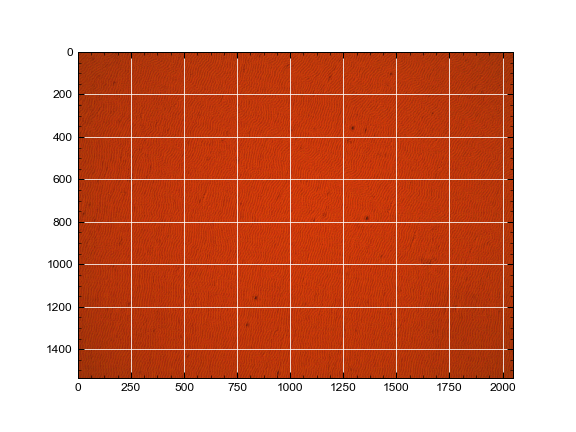

0
x10
y1?600
1
x10
y1?600
2
x11250
y1?800
3
x10
y1?600
4
x10


KeyboardInterrupt: 

In [8]:
# Loop through all images at 50x for annealing temperatures of ~160-162.5
# select which regions to inspect for FFT analysis
thicknessDir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_Au_TPBi','160C')
image_files = glob.glob(os.path.join(thicknessDir,'*.tif'))
disordered=[]
x1s=['']*len(image_files)
x2s=['']*len(image_files)
y1s=['']*len(image_files)
y2s=['']*len(image_files)
x1_list=[]
y1_list=[]
#rotation=[10,70,40]
fig,ax = plt.subplots(figsize=(8,1536/2048*8))
for i,image_file in enumerate(image_files):
    print(i)
    rot_img = misc.imread(image_file)
    width = 600
    if i==0:
        imdata=ax.imshow(rot_img)
    else:
        imdata.set_data(rot_img)
    ax.relim()
    fig.canvas.draw()
    #display.clear_output(wait=True)
    #display.display(fig)
    #input('select crop of image #' +str(i)+', press enter to continue')
    #x1s[i],x2s[i]=ax.get_xlim()
    #y2s[i],y1s[i]=ax.get_ylim()
    #print(x1s[i])
    
    x1_list.append(input('x1'))
    y1_list.append(input('y1?'))


## Example images

(array([  985472.,  3626492.,  1675693.,    16392.,   823653.,  2120198.,
          189284.,        0.,        0.,  3145728.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

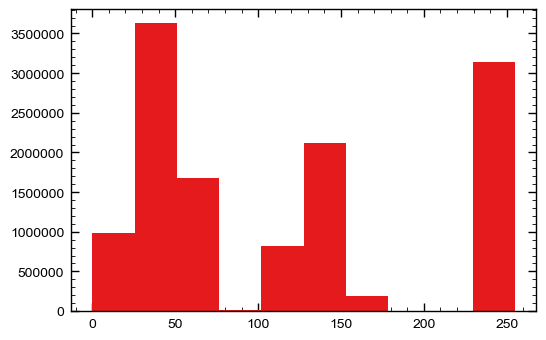

In [99]:
plt.hist(rot_img.ravel())

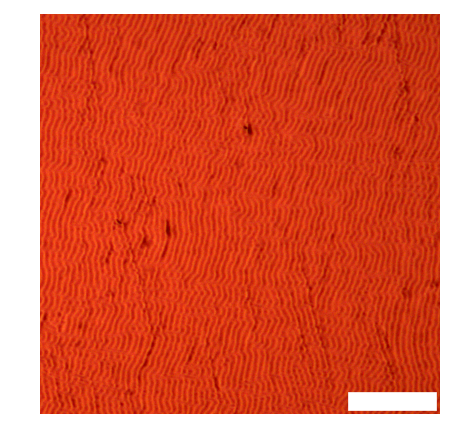

In [7]:
# Example 50x image Au/TPBi 165 C (actually closer to 170C)
image_dir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_Au_TPBi','165C')
image_file = 'mat=TPBi_sub=Si_T=165C_Mag=50x_Polarized=0_t=25nm-000015.tif'
# Load file
img = misc.imread(os.path.join(image_dir,image_file))
# Rotate
rot_img = img#rotate(img,angle=-30)
# Crop - image[y1:y2,x1:x2]
width = 800
y1 = 300
x1 = 1000
crop_img = rot_img[y1:y1+width,x1:x1+width]
# Improve contrast
crop_img = exposure.rescale_intensity(crop_img, in_range=(20,170))#'image'
#rot_img = exposure.equalize_hist(rot_img)
#crop_img = constantMeanContrast(crop_img,1.3)
# Plot
fig,ax = plt.subplots(figsize=(4,crop_img.shape[0]/crop_img.shape[1]*4))
ax.imshow(crop_img)
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax.axis('tight')
ax.axis('off')
add_scalebar(ax,length=20,unit='um',mag='50x',
             show_label=False,height=35)
plt.savefig(os.path.join('FFT Trials','Au-TPBi_nominal170C_50x'),dpi=300)
plt.show()
# Save image for analysis
au_tpbi_50x = img

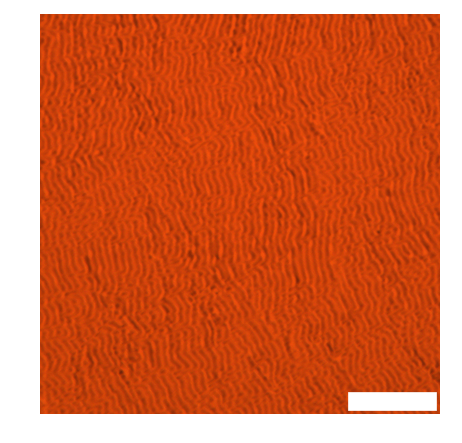

In [6]:
# Example 50x image Si/TPBi 165 C (actually closer to 170C)
image_dir = os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_TPBi','Si','165C')
image_file = 'mat=TPBi_sub=Si_T=165C_Mag=50x_Polarized=0_t=25nm-000011.tif'
# Load file
img = misc.imread(os.path.join(image_dir,image_file))
# Rotate
rot_img = rotate(img,angle=-45)
# Crop - image[y1:y2,x1:x2]
width = 800
y1 = 600
x1 = 700
crop_img = rot_img[y1:y1+width,x1:x1+width]
# Improve contrast
crop_img = exposure.rescale_intensity(crop_img, in_range='image')
#rot_img = exposure.equalize_hist(rot_img)
#crop_img = constantMeanContrast(crop_img,1.3)
# Plot
fig,ax = plt.subplots(figsize=(4,crop_img.shape[0]/crop_img.shape[1]*4))
ax.imshow(crop_img)
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax.axis('tight')
ax.axis('off')
add_scalebar(ax,length=20,unit='um',mag='50x',
             show_label=False,height=35)
plt.savefig(os.path.join('FFT Trials','Si-TPBi_nominal170C_50x'),dpi=300)
plt.show()
# Save image for analysis
si_tpbi_50x = img

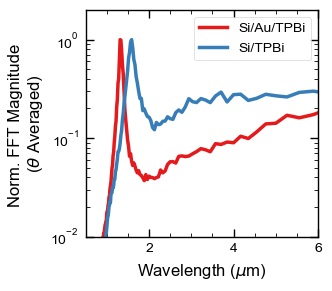

In [20]:
fig,ax=plt.subplots(figsize=(3,3))
au_fft=d_from_fft(au_tpbi_50x,order=15,d_upper=2)
si_fft=d_from_fft(si_tpbi_50x,order=15,d_upper=2)
range_idx = np.logical_and((1/au_fft['k'])<3,(1/au_fft['k'])>0.5)
plt.semilogy(1/au_fft['k'],au_fft['radial']/np.amax(au_fft['radial'][range_idx]),label='Si/Au/TPBi')
plt.semilogy(1/si_fft['k'],si_fft['radial']/np.amax(si_fft['radial'][range_idx]),label='Si/TPBi')
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Norm. FFT Magnitude \n' +  r'($\theta$ Averaged)')
plt.axis([0.5,6,1e-2,2e0])
plt.legend()
plt.savefig(os.path.join('FFT Trials','Si-vs-Au-TPBi_nominal170C_ffts'),dpi=300,bbox_inches='tight')


In [119]:
print(au_fft['d_peak'])
print(si_fft['d_peak'])

1.31578947368
1.5873015873


In [ ]:
#image_dir = os.path.join('2019-02-06_Underlayers','190206_Au_TPBi','165C','4x images')
#image_file = 'mat=TPBi_sub=Si_T=165C_Mag=4x_Polarized=1_t=25nm-000002.tif'
#image_dir = os.path.join('2019-02-06_Underlayers','190206_TPBi','Si','165C')
#image_file = 'mat=TPBi_sub=Si_T=165C_Mag=50x_Polarized=0_t=25nm-000011.tif'
#image_dir = os.path.join('2019-02-06_Underlayers','190206_TPBi','Si','165C','4x images')
#image_file = 'mat=TPBi_sub=Si_T=165C_Mag=4x_Polarized=1_t=25nm-000003.tif'

In [ ]:
#matplotlib.rc('axes',edgecolor='k')
# before_crop=d_from_fft(img,order=15,d_upper=2)
# after_crop=d_from_fft(crop_img,order=15,d_upper=2)
# plt.semilogy(1/before_crop['k'],before_crop['radial'],label='Full Image')
# plt.semilogy(1/after_crop['k'],after_crop['radial'],label='Cropped')
# plt.xlabel('Wavelength ($\mu$m)')
# plt.ylabel('Norm. FFT Magnitude \n' +  r'($\theta$ Averaged)')
# plt.legend()

## FFT vs. Temp for Au and Si

In [21]:
# Find all images at 50x
directories = [os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_Au_TPBi','160C'),
               os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_Au_TPBi','165C'),
               os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_Au_TPBi','170C'),
               os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_TPBi','Si','160C'),
               os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_TPBi','Si','165C'),
               os.path.join('2019-02-06_Si_Au_ITO_TPBi','190206_TPBi','Si','170C')
              ]
optical_ifiles=[]
surfaces=['Au','Au','Au','Si','Si','Si']
temperatures=[160,165,170,160,165,170]
d_avg_fft=[]
Temps_fft=[]
k_fft=[]
radial_fft=[]
peaks_fft=[]
surfaces_fft=[]
for idx,o_dir in enumerate(directories):
    ifiles = glob.glob(os.path.join(o_dir,'*.tif'))
    surfaces_fft.extend([surfaces[idx]]*len(ifiles))
    Temps_fft.extend([temperatures[idx]]*len(ifiles))
    optical_ifiles.extend(ifiles)

In [22]:
# FFT analysis of all images
for idx,ifile in enumerate(optical_ifiles):
    image = misc.imread(ifile,mode='L') #load image
    # Get temperature
#     Temps_fft.append( float( os.path.basename(ifile) # filename
#                         .split('_')[0][2:-1].replace('p','.') ) )
    temp_dict=d_from_fft(image,order=50)
    k_fft.append(temp_dict['k'])
    radial_fft.append(temp_dict['radial'])
    peaks_fft.append(temp_dict['peak_idx'])
    # Add error analysis here?
    # Difficult to quantify with messy background 
    if temp_dict['d_peak']<0:
        #plt.semilogy(temp_dict['k'],temp_dict['radial'])
        print(os.path.basename(ifile))
        #plt.show()
        d_avg_fft.append(np.nan)
    else:
        d_avg_fft.append(temp_dict['d_peak'])

In [145]:
# Make dataframe
df_fft = pd.DataFrame(
        {'T':[T+5 for T in Temps_fft], # adjust temps up 5 C to expected value
        'd_avg':d_avg_fft,
        'fname':optical_ifiles,
        'peak_idx':peaks_fft,
        'k':k_fft,
        'radial':radial_fft,
        'surface':surfaces_fft})

In [152]:
# get confidence intervals
import scipy.stats as stats
def get_t_interval(data,CI):
    upper,lower = stats.t.interval(CI, len(data)-1, loc=np.mean(data), scale=stats.sem(data))
    return upper,lower
def get_norm_interval(data,CI):
    upper,lower = stats.norm.interval(CI, loc=np.mean(data), scale=stats.sem(data))
    return upper,lower
# Function to group and plot data
def group_and_plot(df,group_key,summary_key,label,color,sym='o',error_type='t'):
    df_grouped = group_interval_summary(df,group_key,summary_key)
    y_err_dict = {'t':[df_grouped['t_lower'],df_grouped['t_upper']],
                  'n':[df_grouped['n_lower'],df_grouped['n_upper']],
                  'std':df_grouped['std']}
    plt.errorbar(df_grouped.index,df_grouped['avg'],
             yerr=y_err_dict[error_type],
             fmt=sym,capthick=1.5,capsize=4,label=label,color=color,
                elinewidth=1,linewidth=0)
    return df_grouped
# Quick function to do the same as above
def group_interval_summary(df,group_key,summary_key,CI=0.95):
    '''
    group_key is column to group by, e.g. T_K
    summary_key is column to aggregate into a single list,
    then calculate mean and confidence interval'''
    avg_key = 'avg'
    std_key = 'std'
    # Drop NaN, as they mess up something below
    df = df.dropna(axis=0, how='any')
    # Group by group_key and concatenate numpy arrays in
    # the summary_key column
    df_grouped = df.groupby(group_key)[summary_key].apply(np.hstack).to_frame()
    # Remove non-unique elements, as they may be duplicates
    df_grouped[summary_key]=df_grouped[summary_key].apply(np.unique)
    # Add column of means
    df_grouped[avg_key] = df_grouped[summary_key].apply(np.mean)
    df_grouped[std_key] = df_grouped[summary_key].apply(np.std)
    # Calculate 95% confidence interval using t_statistics
    t_interval = df_grouped[summary_key].apply(get_t_interval, args=(CI,)).apply(pd.Series)
    n_interval = df_grouped[summary_key].apply(get_norm_interval, args=(CI,)).apply(pd.Series)
    # Add interval (as distance from mean) as columns to dataframe
    # This is simply for ease of plotting with matplotlib errorbar
    df_grouped = df_grouped.assign(t_lower=df_grouped[avg_key]-t_interval[0],
                                   t_upper=t_interval[1]-df_grouped[avg_key])
    df_grouped = df_grouped.assign(n_lower=df_grouped[avg_key]-n_interval[0],
                                   n_upper=n_interval[1]-df_grouped[avg_key])
    return df_grouped

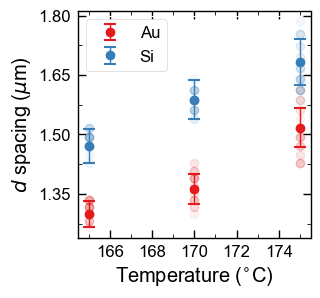

In [156]:
from palettable.colorbrewer.qualitative import Set1_9
colors = Set1_9.mpl_colors
colors = [colors[i] for i in [0,1,3]]
fig,ax = plt.subplots(figsize=(3,3))
plt.plot(df_fft['T'][df_fft['surface']=='Au'],df_fft['d_avg'][df_fft['surface']=='Au'],
         'o',alpha=0.05)
plt.plot(df_fft['T'][df_fft['surface']=='Si'],df_fft['d_avg'][df_fft['surface']=='Si'],
         'o',alpha=0.05)
group_and_plot(df_fft[df_fft['surface']=='Au'],'T','d_avg','Au',colors[0],'o','t')
group_and_plot(df_fft[df_fft['surface']=='Si'],'T','d_avg','Si',colors[1],'o','t')
#plt.axis([150,182.5,1,1.6])
handles, labels = ax.get_legend_handles_labels()
plt.legend([handles[i] for i in [2,3]], [labels[i] for i in [2,3]])
plt.xlabel('Temperature ($^{\circ}$C)')
plt.ylabel('$d$ spacing ($\mu$m)')
setNiceTicks(ax,Nx=6)
#plt.title('TPBi Annealed at 157.5$^{\circ}$C')
#plt.legend()
plt.savefig(os.path.join('FFT Trials','Si-vs-Au-TPBi_dspacing_vs_temperature'),dpi=300,bbox_inches='tight')

## FFT vs. Temp 181126

In [158]:
# Find all images at 50x
directories = [os.path.join('2018-11-26_Ag_Au','10nm_Au_30nm_TPBi','162.5C'),
               os.path.join('2018-11-26_Ag_Au','30nm_TPBi','162.5C')
              ]
optical_ifiles=[]
surfaces=['Au','Si']
temperatures=[162.5,162.5]
d_avg_fft=[]
Temps_fft=[]
k_fft=[]
radial_fft=[]
peaks_fft=[]
surfaces_fft=[]
for idx,o_dir in enumerate(directories):
    ifiles = glob.glob(os.path.join(o_dir,'*.tif'))
    surfaces_fft.extend([surfaces[idx]]*len(ifiles))
    Temps_fft.extend([temperatures[idx]]*len(ifiles))
    optical_ifiles.extend(ifiles)

In [160]:
# FFT analysis of all images
for idx,ifile in enumerate(optical_ifiles):
    image = misc.imread(ifile,mode='L') #load image
    # Get temperature
#     Temps_fft.append( float( os.path.basename(ifile) # filename
#                         .split('_')[0][2:-1].replace('p','.') ) )
    temp_dict=d_from_fft(image,order=50)
    k_fft.append(temp_dict['k'])
    radial_fft.append(temp_dict['radial'])
    peaks_fft.append(temp_dict['peak_idx'])
    # Add error analysis here?
    # Difficult to quantify with messy background 
    if temp_dict['d_peak']<0:
        #plt.semilogy(temp_dict['k'],temp_dict['radial'])
        print(os.path.basename(ifile))
        #plt.show()
        d_avg_fft.append(np.nan)
    else:
        d_avg_fft.append(temp_dict['d_peak'])

In [161]:
# Make dataframe
df_fft_181126 = pd.DataFrame(
        {'T':[T+5 for T in Temps_fft], # adjust temps up 5 C to expected value
        'd_avg':d_avg_fft,
        'fname':optical_ifiles,
        'peak_idx':peaks_fft,
        'k':k_fft,
        'radial':radial_fft,
        'surface':surfaces_fft})

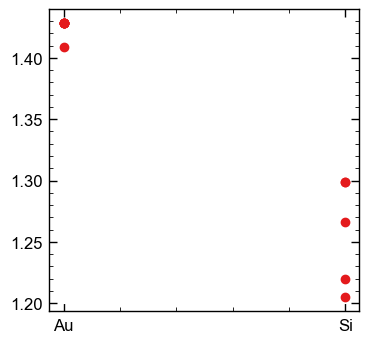

In [171]:
#plt.bar(df_fft_181126['surface'],df_fft_181126['d_avg'],color='0.8')
plt.plot(df_fft_181126['surface'],df_fft_181126['d_avg'],'o')
#group_and_plot(df_fft[df_fft['surface']=='Au'],'T','d_avg','Au',colors[0],'o','t')
#group_and_plot(df_fft[df_fft['surface']=='Si'],'T','d_avg','Si',colors[1],'o','t')
#plt.axis([150,182.5,1,1.6])
# handles, labels = ax.get_legend_handles_labels()
# plt.legend([handles[i] for i in [2,3]], [labels[i] for i in [2,3]])
# plt.xlabel('Temperature ($^{\circ}$C)')
# plt.ylabel('$d$ spacing ($\mu$m)')
# setNiceTicks(ax,Nx=6)
# #plt.title('TPBi Annealed at 157.5$^{\circ}$C')
# #plt.legend()
# plt.savefig(os.path.join('FFT Trials','Si-vs-Au-TPBi_dspacing_vs_temperature'),dpi=300,bbox_inches='tight')

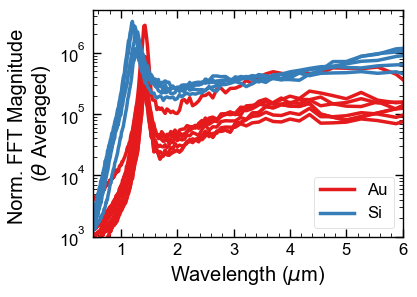

In [176]:
fig,ax=plt.subplots(figsize=(4,3))
for i,row in df_fft_181126.iterrows():
    if row['surface']=='Au':
        c=colors[0]
    else:
        c=colors[1]
    plt.semilogy(1/row['k'],row['radial'],label=row['surface'],color=c)
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Norm. FFT Magnitude \n' +  r'($\theta$ Averaged)')
plt.axis([0.5,6,1e3,5e6])
handles, labels = ax.get_legend_handles_labels()
labels,indices = np.unique(labels,return_index=True)
ax.legend([handle for i,handle in enumerate(handles) if i in indices], 
          labels)
plt.savefig(os.path.join('FFT Trials','181126_Si-vs-Au-TPBi_163C_ffts'),dpi=300,bbox_inches='tight')